# Data Cleaning

# Numerical missing value imputation by class

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
# to view all 81 columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#  we are dropping columns in which missing data exceeds 20 %
null_var = (df.isnull().sum() / df.shape[0]) * 100
drop_columns = null_var[null_var > 20].keys()
print(drop_columns)
df2_drop_clm = df.drop(columns=drop_columns)
df2_drop_clm.shape

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


(1460, 75)

In [8]:
# numerical columns
df3_num = df2_drop_clm.select_dtypes(include=['int64', 'float64'])
df3_num.shape

(1460, 38)

In [9]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
# these are numerical columns which has missing data
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# these are the rows which contain missing data
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
31,NaN,0.0,1966.0
39,65.0,0.0,NaN
42,NaN,0.0,1983.0
43,NaN,0.0,1977.0
48,33.0,0.0,NaN


In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We are filling the missing data with central tendencies of mean, median, mode of classes. To pick a better class you should have good domain knowledge. 
To fill missing values of LotFrontage, we have taken LotConfig under reference

In [13]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [16]:
# we have choosen those rows where LotConfig == 'Inside'
# we have just loaded LotFrontage column
data_set = df[df.loc[:, 'LotConfig'] == 'Inside']['LotFrontage']
# replacing null values with mean of the specific class
data_set.replace(np.nan, data_set.mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [26]:
# for all classes
df_copy = df.copy()
for i in df['LotConfig'].unique():
    data_set = df[df.loc[:, 'LotConfig'] == i]['LotFrontage']
    # replacing null values with mean of the specific class
    df_copy.update(data_set.replace(np.nan, data_set.mean()))

In [27]:
# null values in LotFrontage is zero
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [30]:
df_copy = df.copy()
# these are the variables which contain missing data and numerical values
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# choosing the class for reference
cat_vars = ['LotConfig', 'MasVnrType', 'GarageType']
for cat_var, num_var in zip(cat_vars, num_var_miss) :
    for var_class in df[cat_var].unique() :
        data_set = df[df.loc[:, cat_var] == var_class][num_var_miss]
        df_copy.update(data_set.replace(np.nan, data_set.mean()))

In [31]:
df_copy[num_var_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

/tmp/ipykernel_2059/1134344697.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=False)
/tmp/ipykernel_2059/1134344697.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[var], hist=False)
No artists with labels found to put in legend.  Note that artists

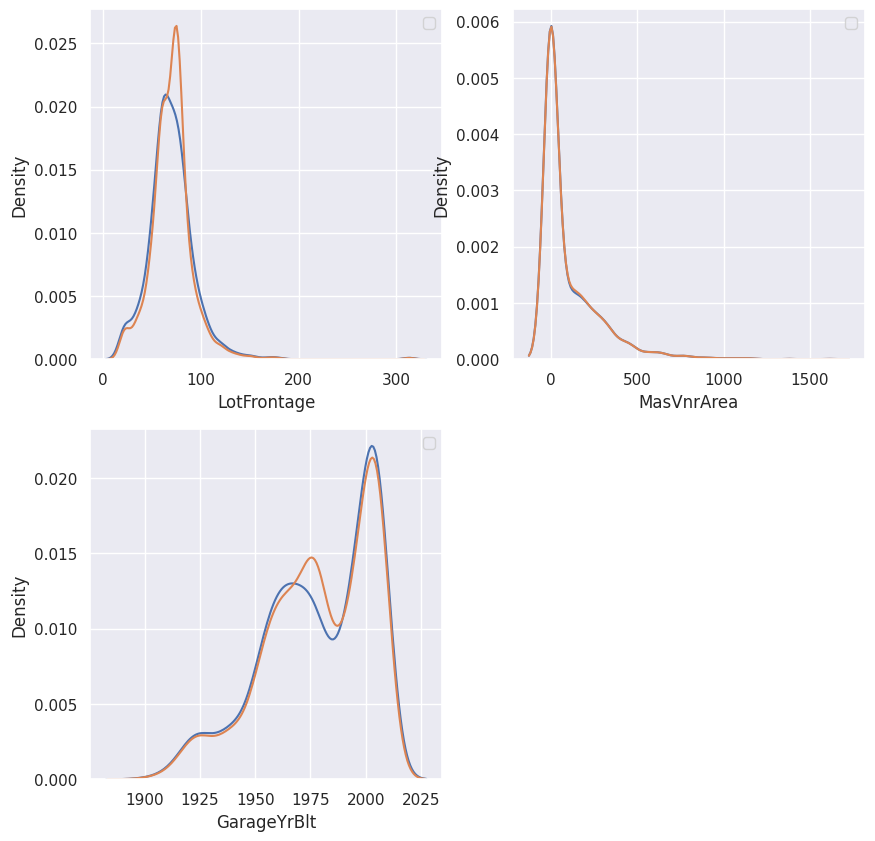

In [34]:
# checking distribution
# overlapping of distplot before and after
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_var_miss):
    plt.subplot(2,2, i + 1)
    sns.distplot(df[var], hist=False)
    sns.distplot(df_copy[var], hist=False)
    plt.legend()

There is not much disturbance when we do such operations. So it is good for ML model.

# Median

In [35]:
df_copy_median = df.copy()
# these are the variables which contain missing data and numerical values
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# choosing the class for reference
cat_vars = ['LotConfig', 'MasVnrType', 'GarageType']
for cat_var, num_var in zip(cat_vars, num_var_miss) :
    for var_class in df[cat_var].unique() :
        data_set = df[df.loc[:, cat_var] == var_class][num_var_miss]
        df_copy_median.update(data_set.replace(np.nan, data_set.median()))

In [36]:
df_copy_median[num_var_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

/tmp/ipykernel_2059/3036623294.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=False, label="Original")
/tmp/ipykernel_2059/3036623294.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[var], hist=False, label="Mean" )
/tmp/ipykernel_2059/3036623294.p

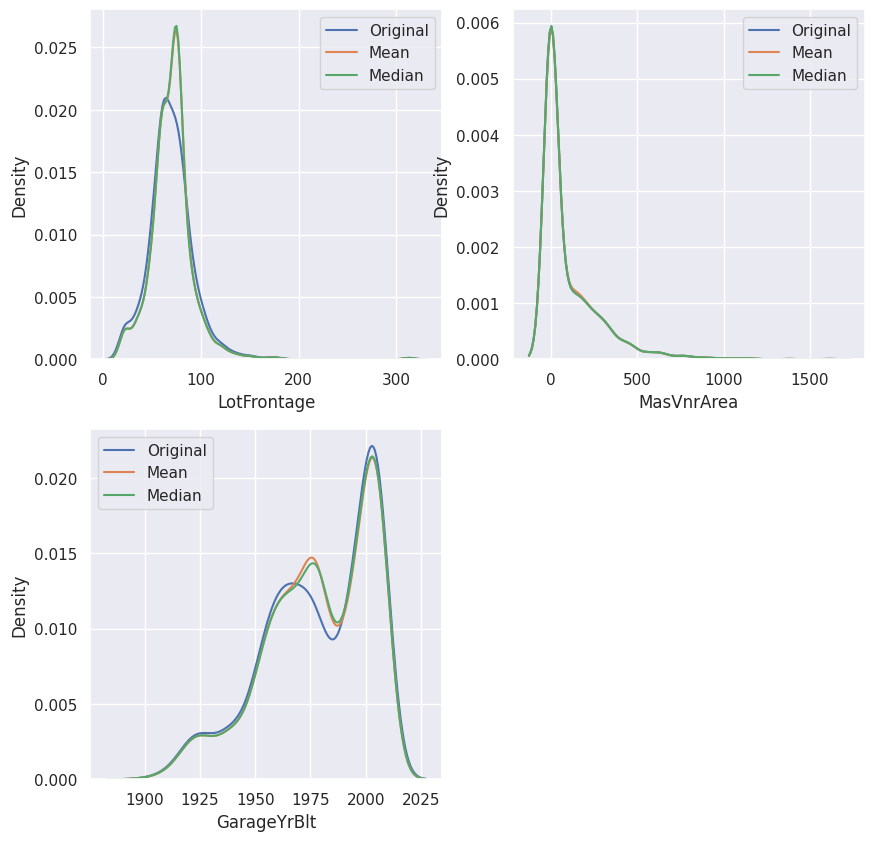

In [39]:
# checking distribution
# overlapping of distplot before and after
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_var_miss):
    plt.subplot(2,2, i + 1)
    sns.distplot(df[var], hist=False, label="Original")
    sns.distplot(df_copy[var], hist=False, label="Mean" )
    sns.distplot(df_copy_median[var], hist=False, label= "Median")
    plt.legend()

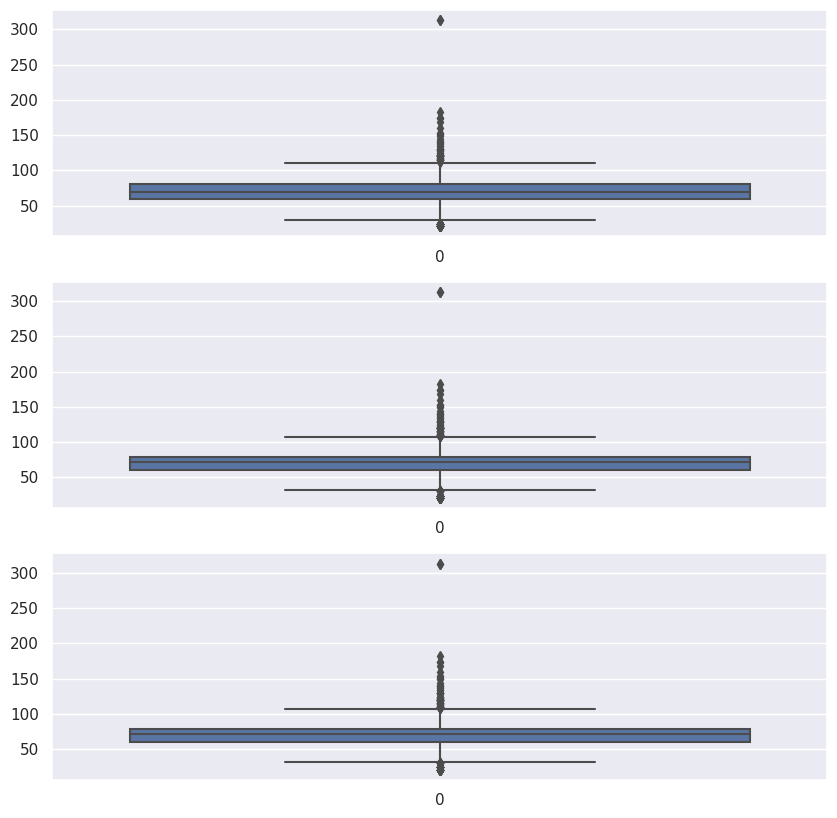

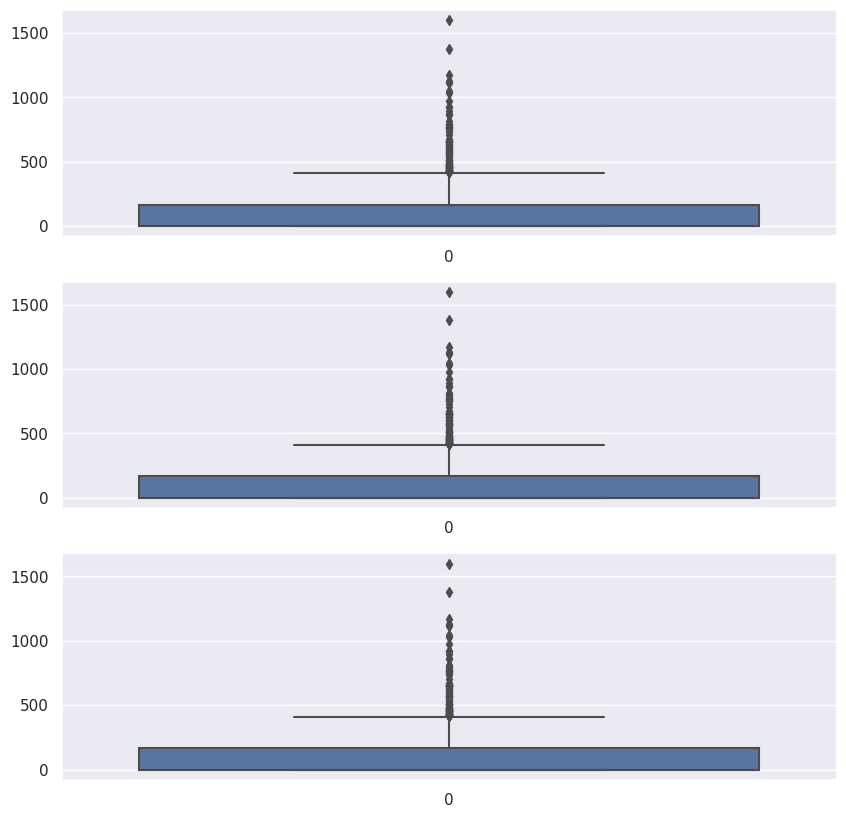

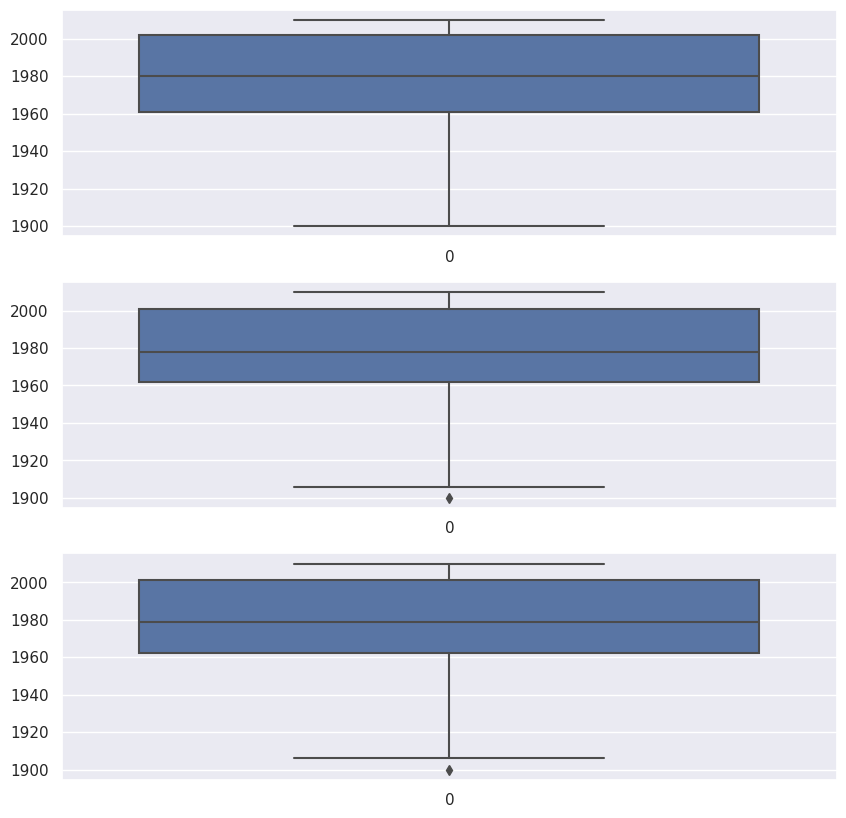

In [42]:
# for outliers
for i, var in enumerate(num_var_miss):
    plt.figure(figsize=(10,10))
    plt.subplot(3, 1, 1)
    sns.boxplot(df[var])
    plt.subplot(3, 1, 2)
    sns.boxplot(df_copy[var])
    plt.subplot(3, 1, 3)
    sns.boxplot(df_copy_median[var])

In [ ]:
"""
There is no disturbace for outliers. So whatever we have done is accurate
"""